# This notebook runs on Google Colab.

In [1]:
!pip install PyDrive

In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#different file
download = drive.CreateFile({'id': '1iwaXc_AqhyUhee2R_C7wSyeIRlRNpWH0'})
download.GetContentFile('instacart_combined_data.csv')

# Inferential Statistics

In [0]:
# We import the needed packages.
import pandas as pd
import numpy as np
from numpy import *

import math
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import seaborn as sns
import scipy.stats as st

sns.set()
np.random.seed(55)


In [6]:
data_all = pd.read_csv('instacart_combined_data.csv')
data_all.head()

,user_id,order_number,add_to_cart_order,order_id,eval_set,order_dow,order_hour_of_day,days_since_prior_order,product_id,reordered,product_name,aisle_id,department_id,aisle,department
0,1,1,1,2539329,prior,2,8,NaN,196,0,Soda,77,7,soft drinks,beverages
1,1,1,2,2539329,prior,2,8,NaN,14084,0,Organic Unsweetened Vanilla Almond Milk,91,16,soy lactosefree,dairy eggs
2,1,1,3,2539329,prior,2,8,NaN,12427,0,Original Beef Jerky,23,19,popcorn jerky,snacks
3,1,1,4,2539329,prior,2,8,NaN,26088,0,Aged White Cheddar Popcorn,23,19,popcorn jerky,snacks
4,1,1,5,2539329,prior,2,8,NaN,26405,0,XL Pick-A-Size Paper Towel Rolls,54,17,paper goods,household


In [7]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33819106 entries, 0 to 33819105
Data columns (total 15 columns):
user_id                   int64
order_number              int64
add_to_cart_order         int64
order_id                  int64
eval_set                  object
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
product_id                int64
reordered                 int64
product_name              object
aisle_id                  int64
department_id             int64
aisle                     object
department                object
dtypes: float64(1), int64(10), object(4)
memory usage: 3.8+ GB


In [8]:
data_all.count()

user_id                   33819106
order_number              33819106
add_to_cart_order         33819106
order_id                  33819106
eval_set                  33819106
order_dow                 33819106
order_hour_of_day         33819106
days_since_prior_order    31741038
product_id                33819106
reordered                 33819106
product_name              33819106
aisle_id                  33819106
department_id             33819106
aisle                     33819106
department                33819106
dtype: int64

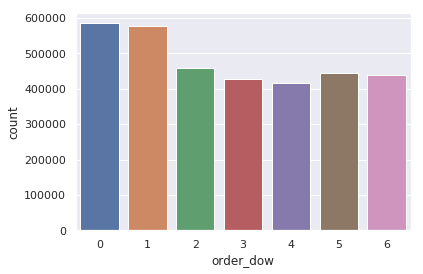

In [9]:
day = data_all[data_all['add_to_cart_order'] == 1]


sns.countplot(x='order_dow', data = day)

It looks like 0 and 1 are weekend days.

##__Reorders__

What is the ratio of reordered items?



In [10]:
reorderered_ratio = data_all['reordered'].aggregate('sum')/data_all['reordered'].aggregate('count')
print('reorder average ratio is ', reorderered_ratio)

reorder average ratio is  0.5900617242809434


In [11]:
reordered_prop = (data_all.groupby('product_id')['reordered'].aggregate('sum')/
             data_all.groupby('product_id')['reordered'].aggregate('count'))
reordered_prop.head(20)

product_id
1     0.614627
2     0.138298
3     0.738516
4     0.458689
5     0.625000
6     0.375000
7     0.419355
8     0.505618
9     0.521739
10    0.510591
11    0.566038
12    0.509653
13    0.300000
14    0.111111
15    0.166667
16    0.100000
17    0.111111
18    0.587413
19    0.000000
20    0.166667
Name: reordered, dtype: float64

Which are the most reordered items?



In [12]:
reordered_sort = reordered_prop.sort_values(ascending=False)
reordered_sort.head(30)

product_id
6433     0.942029
2075     0.933333
43553    0.923077
27740    0.921569
14609    0.914286
13875    0.911111
39992    0.909091
5868     0.900000
36543    0.898551
26093    0.895522
4212     0.894737
35604    0.894231
38438    0.892857
38251    0.891892
36801    0.888889
31418    0.887097
38529    0.880952
47825    0.880000
25766    0.875000
14725    0.870968
2406     0.870968
10236    0.870229
20598    0.868421
15657    0.866667
5457     0.866667
41046    0.864865
2142     0.864407
35910    0.863636
35496    0.862144
700      0.862069
Name: reordered, dtype: float64

In [13]:
product_clt = data_all.groupby('product_id')['product_name'].count() 
#data_sign = data_all.loc[product_clt]

product_clt.head()

product_id
1    1928
2      94
3     283
4     351
5      16
Name: product_name, dtype: int64

In [0]:
products_large = pd.DataFrame(product_clt)
products_large.columns = ['product_total']

In [15]:
products_large.head()

,product_total
product_id,
1,1928
2,94
3,283
4,351
5,16


In [0]:
products_large['proportion'] = reordered_prop
products_large ['reord_total'] = products_large['product_total'] * products_large['proportion']
products_large['not_reord'] = products_large['product_total'] - products_large['reord_total']

In [17]:
products_large.head()

,product_total,proportion,reord_total,not_reord
product_id,,,,
1,1928,0.614627,1185.0,743.0
2,94,0.138298,13.0,81.0
3,283,0.738516,209.0,74.0
4,351,0.458689,161.0,190.0
5,16,0.625000,10.0,6.0


In [18]:
#products large with 50 min and reord_total >=5
#prod_50 = products_large['product_total'] >=50


products_clt_50 = products_large[products_large['product_total'] >=50]
products_clt_50 = products_clt_50[products_clt_50['reord_total'] >=5]
products_clt_50 = products_clt_50[products_clt_50['not_reord']>=5]
products_clt_50 = products_clt_50[['product_total', 'proportion', 'reord_total']]
products_clt_50.head(20)

,product_total,proportion,reord_total
product_id,,,
1,1928,0.614627,1185.0
2,94,0.138298,13.0
3,283,0.738516,209.0
4,351,0.458689,161.0
8,178,0.505618,90.0
9,161,0.521739,84.0
10,2691,0.510591,1374.0
11,106,0.566038,60.0
12,259,0.509653,132.0


In [19]:
products_50_sort = products_clt_50.sort_values('proportion', ascending=False)

products_50_sort.head(20)

,product_total,proportion,reord_total
product_id,,,
2075,90,0.933333,84.0
27740,102,0.921569,94.0
36543,69,0.898551,62.0
26093,67,0.895522,60.0
35604,104,0.894231,93.0
38251,111,0.891892,99.0
36801,99,0.888889,88.0
31418,62,0.887097,55.0
10236,131,0.870229,114.0


In [20]:
sample_products = products_50_sort.sample(40, random_state=55).sort_values('proportion')
sample_products = pd.DataFrame(sample_products)
sample_products

,product_total,proportion,reord_total
product_id,,,
28222,62,0.112903,7.0
25015,66,0.212121,14.0
495,477,0.241090,115.0
36025,123,0.252033,31.0
7365,90,0.255556,23.0
7140,96,0.260417,25.0
97,170,0.270588,46.0
12514,225,0.284444,64.0
15016,446,0.284753,127.0


We can use these random products to test hypothesis:

The difference between two proportions is statistically significant, when the difference in proportion ratio is at least 0.1.

We can choose pairs of products 25094 and 29380; 36160 and 495; 25094 and 25015.

In [0]:
def check_hypothesis(data, prod1, prod2, level):
  ''' the function check_hypothesis takes two products from sample_prodcuts and
  calculates z-value and standard error and checks if the H_0 hypothesis stated above
  is rejected or not, two tail test.
  Assumption: proportion for first product is bigger.
  '''
  n1 = data.loc[prod1][0]
  n2 = data.loc[prod2][0]

  x1 =data.loc[prod1][2]
  x2 = data.loc[prod2][2]

  #print info about products
  print('Product1: ', prod1, ' total: ', n1, ' reordered: ', x1, ' ratio: ', x1/n1, '\n')
  print('Product2: ', prod2, ' total: ', n2, ' reordered: ', x2, ' ratio: ', x2/n2, '\n')

  pooled_prop = (x1 + x2) / (n1 + n2)
  error = np.sqrt(pooled_prop * (1 - pooled_prop)*(1 / n1 + 1 / n2))
  z_diff = (x1 / n1 - x2 / n2) / error
  z_stat = st.norm.ppf(1 - level/2)
  print(z_stat)
  if z_diff > z_stat:
    h_0 = "H0 is rejected at level " + str(level)
  else:
    h_0 = "Failed to reject H0 at level " + str(level)
  return z_diff, error, h_0

In [22]:
# products 29380 and 25094
p1 = 29380
name1 = str(day[day['product_id']==p1]['product_name'].unique())
p2 = 25094
name2 = str(day[day['product_id']==p2]['product_name'].unique())
print(f'Product {p1} name {name1}\n')
print(f'Product {p2} name {name2}\n')
z_diff, error, h_0 =check_hypothesis(sample_products, p1, p2, 0.05)
print('Calculated z-value under null hypothesis: ', z_diff)
print('Calculated error under null hypothesis: ', error)
print(h_0)

Product 29380 name ['Party Cutlery Full Size Forks']

Product 25094 name ['Brown Sugar Blend']

Product1:  29380  total:  332.0  reordered:  138.0  ratio:  0.41566265060240964 

Product2:  25094  total:  124.0  reordered:  39.0  ratio:  0.31451612903225806 

1.959963984540054
Calculated z-value under null hypothesis:  1.9720799738202193
Calculated error under null hypothesis:  0.051289259519336515
H0 is rejected at level 0.05


In [23]:
# products 36160 and 495
p1 = 36160
name1 = str(day[day['product_id']==p1]['product_name'].unique())
p2 = 495
name2 = str(day[day['product_id']==p2]['product_name'].unique())

print(f'Product {p1} name {name1}\n')
print(f'Product {p2} name {name2}\n')

z_diff, error, h_0 =check_hypothesis(sample_products, p1, p2, 0.05)

print('Calculated z-value under null hypothesis: ', z_diff)
print('Calculated error under null hypothesis: ', error)
print(h_0)

Product 36160 name ['Cleaning & Disinfecting Solution Triple Action Cleaning']

Product 495 name ['Pure Cane Granulated W/Spout Sugar']

Product1:  36160  total:  121.0  reordered:  42.0  ratio:  0.34710743801652894 

Product2:  495  total:  477.0  reordered:  115.0  ratio:  0.24109014675052412 

1.959963984540054
Calculated z-value under null hypothesis:  2.3670642679188387
Calculated error under null hypothesis:  0.04478851406904002
H0 is rejected at level 0.05




We can use these random products to test hypothesis:

The difference between two proportions is statistically significant, when the difference in proportion ratio is at least 0.1.

We can choose pairs of products 495  and 36025; 12579 and 41149; 33313 and 9107.

In [24]:
# products 25015 and 25094

p1 = 25015
name1 = str(day[day['product_id']==p1]['product_name'].unique())
p2 = 25094
name2 = str(day[day['product_id']==p2]['product_name'].unique())

print(f'Product {p1} name {name1}\n')
print(f'Product {p2} name {name2}\n')

z_diff, error, h_0 =check_hypothesis(sample_products, p1, p2, 0.05)

print('Calculated z-value under null hypothesis: ', z_diff)
print('Calculated error under null hypothesis: ', error)
print(h_0)

Product 25015 name ['Raw Fit High Protein Vanilla Single Packet']

Product 25094 name ['Brown Sugar Blend']

Product1:  25015  total:  66.0  reordered:  14.0  ratio:  0.21212121212121213 

Product2:  25094  total:  124.0  reordered:  39.0  ratio:  0.31451612903225806 

1.959963984540054
Calculated z-value under null hypothesis:  -1.4984414926321223
Calculated error under null hypothesis:  0.06833427759076649
Failed to reject H0 at level 0.05


In [25]:
# products 33313 and 28016

p1 = 33313
name1 = str(day[day['product_id']==p1]['product_name'].unique())
p2 = 28016
name2 = str(day[day['product_id']==p2]['product_name'].unique())

print(f'Product {p1} name {name1}\n')
print(f'Product {p2} name {name2}\n')

z_diff, error, h_0 =check_hypothesis(sample_products, p1, p2, 0.05)

print('Calculated z-value under null hypothesis: ', z_diff)
print('Calculated error under null hypothesis: ', error)
print(h_0)

Product 33313 name ['Dark Sumatra Ground Coffee']

Product 28016 name ['White Meat Fun Nuggets']

Product1:  33313  total:  341.0  reordered:  212.0  ratio:  0.6217008797653959 

Product2:  28016  total:  1006.0  reordered:  523.0  ratio:  0.5198807157057654 

1.959963984540054
Calculated z-value under null hypothesis:  3.263430661096614
Calculated error under null hypothesis:  0.031200345474910664
H0 is rejected at level 0.05


__Difference 0.15__

We see that the difference of 0.1 between the proportion is too low to reject null hypothesis. We need to increase the difference between the proportion. Let choose approximate value of 0.15 and use the sample above.

Pairs of products: 29380 and 7140, 1991 and 97, 23932 and 26351.


In [26]:
# products 29380 and 7140
p1 = 29380
name1 = str(day[day['product_id']==p1]['product_name'].unique())
p2 = 7140
name2 = str(day[day['product_id']==p2]['product_name'].unique())

print(f'Product {p1} name {name1}\n')
print(f'Product {p2} name {name2}\n')

z_diff, error, h_0 =check_hypothesis(sample_products, p1, p2, 0.05)

print('Calculated z-value under null hypothesis: ', z_diff)
print('Calculated error under null hypothesis: ', error)
print(h_0)

Product 29380 name ['Party Cutlery Full Size Forks']

Product 7140 name ['Deep Clean Invigorating Foaming Scrub']

Product1:  29380  total:  332.0  reordered:  138.0  ratio:  0.41566265060240964 

Product2:  7140  total:  96.0  reordered:  25.0  ratio:  0.2604166666666667 

1.959963984540054
Calculated z-value under null hypothesis:  2.75886327418879
Calculated error under null hypothesis:  0.056271720816389904
H0 is rejected at level 0.05


In [27]:
# products 19291 and 97
p1 = 19291
name1 = str(day[day['product_id']==p1]['product_name'].unique())
p2 = 97
name2 = str(day[day['product_id']==p2]['product_name'].unique())

print(f'Product {p1} name {name1}\n')
print(f'Product {p2} name {name2}\n')

z_diff, error, h_0 =check_hypothesis(sample_products, p1, p2, 0.05)

print('Calculated z-value under null hypothesis: ', z_diff)
print('Calculated error under null hypothesis: ', error)
print(h_0)

Product 19291 name ['Raspberry Lemonade 12 Quart Drink Mix']

Product 97 name ['Organic Chamomile Lemon Tea']

Product1:  19291  total:  173.0  reordered:  73.0  ratio:  0.42196531791907516 

Product2:  97  total:  170.0  reordered:  46.0  ratio:  0.27058823529411763 

1.959963984540054
Calculated z-value under null hypothesis:  2.9448095548267386
Calculated error under null hypothesis:  0.05140471049370253
H0 is rejected at level 0.05


In [28]:
# products 26351 and 23432
p1 = 26351
name1 = str(day[day['product_id']==p1]['product_name'].unique())
p2 = 23432
name2 = str(day[day['product_id']==p2]['product_name'].unique())

print(f'Product {p1} name {name1}\n')
print(f'Product {p2} name {name2}\n')

z_diff, error, h_0 =check_hypothesis(sample_products, p1, p2, 0.05)

print('Calculated z-value under null hypothesis: ', z_diff)
print('Calculated error under null hypothesis: ', error)
print(h_0)

Product 26351 name ['Gluten Free Mini Pretzels']

Product 23432 name ['Baked Chicken Breast']

Product1:  26351  total:  3330.0  reordered:  2136.0  ratio:  0.6414414414414414 

Product2:  23432  total:  288.0  reordered:  143.0  ratio:  0.4965277777777778 

1.959963984540054
Calculated z-value under null hypothesis:  4.886518272427559
Calculated error under null hypothesis:  0.029655811271871578
H0 is rejected at level 0.05


__Reordered proportion per day__

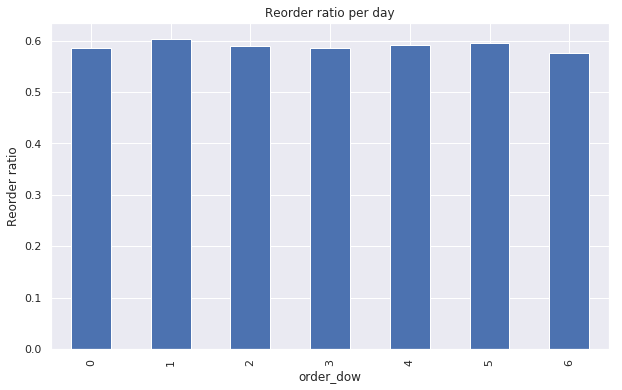

In [29]:
product_dow = data_all.groupby('order_dow')['reordered']
plt.figure(figsize=(10, 6))
plt.xlabel('Day')
plt.ylabel('Reorder ratio')
plt.title('Reorder ratio per day')
prodcut_dow_ratio = product_dow.aggregate('mean').plot(kind='bar')
plt.show()

Reorder ratio per hour

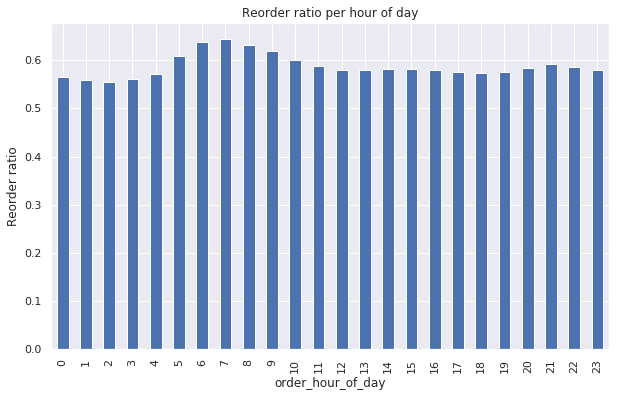

In [30]:
product_dow = data_all.groupby('order_hour_of_day')['reordered']
plt.figure(figsize=(10, 6))
plt.xlabel('Hour')
plt.ylabel('Reorder ratio')
plt.title('Reorder ratio per hour of day')
prodcut_dow_ratio = product_dow.aggregate('mean').plot(kind='bar')
plt.show()

__Hypothesis__: The difference in reorder ratio proportions for products ordered in different days and hours of the day is statistically significant.

In [0]:
product_day_hour = data_all.groupby(['order_dow', 'order_hour_of_day'])['reordered']

product_dh_ratio = product_day_hour.aggregate('mean')

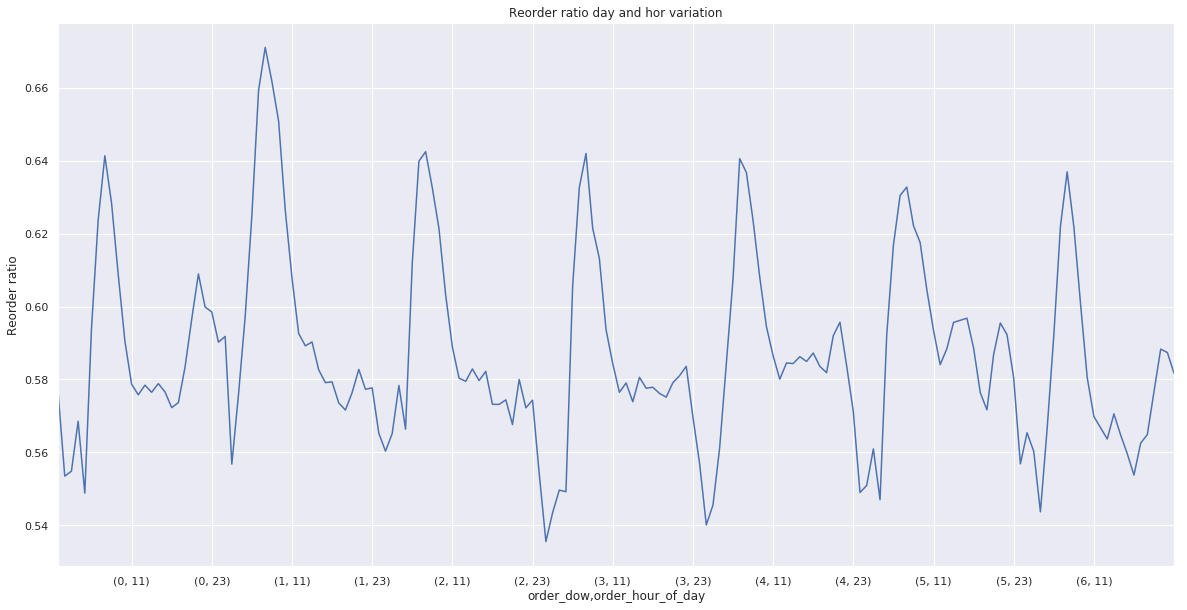

In [32]:
plt.figure(figsize=(20, 10))
plt.xlabel('Day and hour of order')
plt.ylabel('Reorder ratio')
plt.title('Reorder ratio day and hor variation')
plt.xticks(range(-1, 167, 12), range(0, 168, 12), rotation=60)

product_dh_ratio.plot()
plt.show()

We print the values of reorder ratio per day and hour.

In [33]:
display(product_dh_ratio.unstack())


order_hour_of_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,,,,
0,0.576550,0.553474,0.554843,0.568533,0.548804,0.593939,0.623720,0.641375,0.628425,0.608782,0.590530,0.578722,0.575781,0.578439,0.576480,0.578859,0.576589,0.572274,0.573635,0.583387,0.596562,0.608958,0.599885,0.598522
1,0.590223,0.591805,0.556773,0.575907,0.597298,0.625008,0.659281,0.671103,0.661747,0.650900,0.626395,0.607933,0.592622,0.589225,0.590289,0.582638,0.579127,0.579337,0.573562,0.571607,0.576382,0.582751,0.577297,0.577697
2,0.565236,0.560328,0.565167,0.578346,0.566349,0.611795,0.639887,0.642499,0.632594,0.621359,0.603170,0.588945,0.580363,0.579495,0.582892,0.579705,0.582220,0.573174,0.573160,0.574400,0.567638,0.579992,0.572223,0.574320
3,0.554133,0.535516,0.543409,0.549647,0.549194,0.605566,0.632678,0.641998,0.621488,0.613189,0.593657,0.584359,0.576467,0.579034,0.573884,0.580590,0.577596,0.577870,0.576167,0.575149,0.579100,0.581025,0.583596,0.569703
4,0.556915,0.540088,0.545530,0.561249,0.584238,0.607564,0.640583,0.636789,0.623603,0.608061,0.594486,0.586491,0.580078,0.584514,0.584366,0.586248,0.584938,0.587255,0.583577,0.581859,0.592002,0.595699,0.583805,0.571182
5,0.548980,0.550912,0.560946,0.546990,0.592179,0.616801,0.630476,0.632785,0.622217,0.617564,0.604645,0.593502,0.584064,0.588443,0.595649,0.596224,0.596805,0.588618,0.576357,0.571663,0.586883,0.595490,0.592294,0.580418
6,0.556838,0.565372,0.560270,0.543677,0.566370,0.591974,0.622106,0.636951,0.621953,0.600847,0.580525,0.569842,0.566758,0.563666,0.570564,0.564776,0.559598,0.553762,0.562518,0.564884,0.576726,0.588330,0.587386,0.581613


In [34]:
product_dh_count_reorder = pd.DataFrame()
product_dh_count_reorder ['total'] = product_day_hour.aggregate('count')
product_dh_count_reorder['reordered'] = product_day_hour.aggregate('sum')
print('Ordered products per day and hour')
display(product_dh_count_reorder['total'].unstack())
print('Reordered products per hour and day')
display(product_dh_count_reorder['reordered'].unstack())


Ordered products per day and hour


order_hour_of_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,,,,
0,40444,23647,13566,9375,8739,12242,36425,140403,321927,462336,542965,564267,563020,587135,595896,581287,527908,416816,300095,229047,192892,161558,126891,74811
1,38560,18866,11132,7305,7919,14979,54881,170880,343737,521484,568411,526566,479604,475107,471210,459764,435568,352051,270431,206866,157753,124681,94913,59166
2,30957,15250,8693,7352,7144,13243,45158,127152,231210,339918,371872,365260,341984,347977,348250,347439,343865,289659,236761,178193,136254,106898,83471,54400
3,28513,14205,9111,6093,7196,12253,42426,115125,206371,288048,325491,323729,308309,314999,316153,326788,318655,272577,222248,171472,127118,104338,84872,52408
4,25740,14281,8434,6596,7182,12560,41609,118105,201808,280837,317797,313125,301061,305625,309373,312141,309872,264970,216530,176132,135829,112755,93557,56777
5,30890,16057,9894,8704,9232,15368,48189,134439,232906,327762,369283,368698,348700,350678,360662,357337,340423,282285,227529,174797,130929,103320,82167,56194
6,32927,19106,11830,8334,8302,11264,33954,122135,249400,330184,379086,391056,389921,396533,409374,395975,371404,308051,240851,181069,137183,117633,96182,65829


Reordered products per hour and day


order_hour_of_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,,,,
0,23318,13088,7527,5330,4796,7271,22719,90051,202307,281462,320637,326554,324176,339622,343522,336483,304386,238533,172145,133623,115072,98382,76120,44776
1,22759,11165,6198,4207,4730,9362,36182,114678,227467,339434,356050,320117,284224,279945,278150,267876,252249,203956,155109,118246,90926,72658,54793,34180
2,17498,8545,4913,4252,4046,8102,28896,81695,146262,211211,224302,215118,198475,201651,202992,201412,200205,166025,135702,102354,77343,62000,47764,31243
3,15800,7607,4951,3349,3952,7420,26842,73910,128257,176628,193230,189174,177730,182395,181435,189730,184054,157514,128052,98622,73614,60623,49531,29857
4,14335,7713,4601,3702,4196,7631,26654,75208,125848,170766,188926,183645,174639,178642,180787,182992,181256,155605,126362,102484,80411,67168,54619,32430
5,16958,8846,5550,4761,5467,9479,30382,85071,144918,202414,223285,218823,203663,206354,214828,213053,203166,166158,131138,99925,76840,61526,48667,32616
6,18335,10802,6628,4531,4702,6668,21123,77794,155115,198390,220069,222840,220991,223512,233574,223637,207837,170587,135483,102283,79117,69207,56496,38287


The dataset is very large. Even very small differences between different days and times may be statisticall significant. We would like to investigate the treshhold to see whether the day and time are correlated with the reorder ratio.

We can choose the days with smallest amount of sales, 

__Hypothesis testing__

The differences in reorder ratio proportions for products ordered in different days and times is statistically significant, when the difference between proportion is more than 0.02.

In [0]:
def check_hypothesis2(data, d1, h1, d2, h2, level):
  ''' the function check_hypothesis takes two populations  from dataframe  and
  calculates z-value and standard error and checks if the H_0 hypothesis stated above
  is rejected or not, two tail test.
  Assumption: proportion for first product is bigger.
  '''

  dta = data.reset_index()
  n1 = dta.iloc[d1*24 +h1,2]
  n2 = dta.iloc[d2*24 +h2,2]

  x1 = dta.iloc[d1*24 +h1, 3]
  x2 = dta.iloc[d2*24 +h2, 3]

  # print information for day, time and proportion
  print('The first day: {}, hour: {}, products: {}, reordered: {}, proportion: {} \n'.format(
      d1, h1, n1, x1, x1/n1))
  print('The second day: {}, hour: {}, products: {}, reordered: {}, proportion: {} \n'.format(
      d2, h2, n2, x2, x2/n2))
  pooled_prop = (x1 + x2) / (n1 + n2)
  error = np.sqrt(pooled_prop * (1 - pooled_prop)*(1 / n1 + 1 / n2))
  z_diff = np.absolute(x1 / n1 - x2 / n2) / error
  z_stat = st.norm.ppf(1 - level/2)
  #print(z_stat)
  if z_diff > z_stat:
    h_0 = "H0 is rejected at level " + str(level)
  else:
    h_0 = "Failed to reject H0 at level " + str(level)
  return z_diff, h_0

In [36]:
check_hypothesis2(product_dh_count_reorder, 3, 3, 4, 3, 0.05)
 

The first day: 3, hour: 3, products: 6093, reordered: 3349, proportion: 0.5496471360577713 

The second day: 4, hour: 3, products: 6596, reordered: 3702, proportion: 0.5612492419648272 



(1.3140701304039866, 'Failed to reject H0 at level 0.05')

For the days and times when the least number of products are ordered, we cannot reject the hypothesis that the two samples come from the same population. However, if we choose different days and times, the samples are statistically significant. 

Below, we see the hypothesis test using same day 3, and hours 0 and 1, and also, choosing completely different days and times: day 1 hour 6 and day 3 hour 1.

In [37]:
check_hypothesis2(product_dh_count_reorder, 3, 0, 3, 1, 0.01)

The first day: 3, hour: 0, products: 28513, reordered: 15800, proportion: 0.5541332023989057 

The second day: 3, hour: 1, products: 14205, reordered: 7607, proportion: 0.535515663498768 



(3.6424579116376608, 'H0 is rejected at level 0.01')

In [38]:
check_hypothesis2(product_dh_count_reorder, 1, 6, 3, 1, 0.01)

The first day: 1, hour: 6, products: 54881, reordered: 36182, proportion: 0.6592809897778831 

The second day: 3, hour: 1, products: 14205, reordered: 7607, proportion: 0.535515663498768 



(27.290319378376648, 'H0 is rejected at level 0.01')

__Reorder ratio by aisle__

In [39]:
products_aisle = data_all.groupby(['aisle'])['reordered']
products_aisle_ratio = products_aisle.aggregate('mean').sort_values(ascending=False).to_frame()
products_aisle_ratio.rename(columns={'reordered': 'ratio'}, inplace=True)
print(products_aisle_ratio.head(10))
print(products_aisle_ratio.tail(10))

                                  ratio
aisle                                  
milk                           0.781812
water seltzer sparkling water  0.729930
fresh fruits                   0.718823
eggs                           0.706359
soy lactosefree                0.692361
packaged produce               0.691977
yogurt                         0.686501
cream                          0.685184
bread                          0.670552
refrigerated                   0.663006
                          ratio
aisle                          
hair care              0.246759
skin care              0.242849
deodorants             0.238818
cold flu allergy       0.235341
eye ear care           0.220542
beauty                 0.212858
first aid              0.195864
kitchen supplies       0.194802
baking supplies decor  0.167595
spices seasonings      0.152933


In [0]:
products_aisle_ratio['total'] = products_aisle.aggregate('count')
products_aisle_ratio['reordered'] = products_aisle.aggregate('sum')

In [41]:
products_aisle_ratio = products_aisle_ratio[['total', 'ratio', 'reordered']]
print(products_aisle_ratio.head())

                                 total     ratio  reordered
aisle                                                      
milk                            923659  0.781812     722128
water seltzer sparkling water   878150  0.729930     640988
fresh fruits                   3792661  0.718823    2726251
eggs                            472009  0.706359     333408
soy lactosefree                 664493  0.692361     460069


With large number of items in our dataset, we can form a hypothesis about aisles populations.

We can choose products with small total and reorder ratio difference about 0.02:
kitchen supplies and beauty.

Null hypothesis
H_0: mu_1 = mu_2

Aisles 'kithchen supplies' and 'beauty' are samples of the same population.

Alternative hypothesis
H_1: mu_1 not equal mu_2




In [42]:
# testing beauty and kitchen supplies one population.
z_diff, error, h0 = check_hypothesis(products_aisle_ratio,  
                                     'beauty','kitchen supplies', 0.05)
print('Calculated z-value under null hypothesis: ', z_diff)
print('Calculated error under null hypothesis: ', error)
print(h_0)

Product1:  beauty  total:  6455.0  reordered:  1374.0  ratio:  0.21285824941905498 

Product2:  kitchen supplies  total:  9620.0  reordered:  1874.0  ratio:  0.1948024948024948 

1.959963984540054
Calculated z-value under null hypothesis:  2.7948354057124396
Calculated error under null hypothesis:  0.006460399986222991
H0 is rejected at level 0.05


The null hypothesis is rejected for products from aisles with small total items sold and reorder ratio difference less than 0.02. We beleive that that hypotesis will be rejected for aisles with larger total sells and reorder proportion with larger differences.

We can check if similar hypothesis holds for two of most ordered items:



water seltzer sparkling water

fresh fruits

Forming the same population that the two products are samples of the same population and have the same mean.

The alternative  hypothesis is the mean of the two samples are different. 
We check at level 0.05.




In [43]:
z_diff, error, h0 = check_hypothesis(products_aisle_ratio,  
                                     'water seltzer sparkling water',
                                     'fresh fruits', 0.05)
print('Calculated z-value under null hypothesis: ', z_diff)
print('Calculated error under null hypothesis: ', error)
print(h_0)

Product1:  water seltzer sparkling water  total:  878150.0  reordered:  640988.0  ratio:  0.7299299664066503 

Product2:  fresh fruits  total:  3792661.0  reordered:  2726251.0  ratio:  0.7188227474061089 

1.959963984540054
Calculated z-value under null hypothesis:  20.90996782994115
Calculated error under null hypothesis:  0.0005311925437129053
H0 is rejected at level 0.05


__Product ratio by departtment__

In [44]:
products_dept = data_all.groupby(['department'])['reordered']
products_dept_ratio = products_dept.aggregate('mean').sort_values(ascending=False).to_frame()
products_dept_ratio.rename(columns={'reordered': 'ratio'}, inplace=True)
print(products_dept_ratio.head())
print(products_dept_ratio.tail())

               ratio
department          
dairy eggs  0.670161
beverages   0.653651
produce     0.650521
bakery      0.628381
deli        0.608130
                  ratio
department             
household      0.403339
missing        0.394323
international  0.369682
pantry         0.347400
personal care  0.321863


In [45]:
products_dept_ratio['total'] = products_dept.aggregate('count')
products_dept_ratio['reordered'] = products_dept.aggregate('sum')
products_dept_ratio = products_dept_ratio[['total', 'ratio', 'reordered']]
print(products_dept_ratio)

                   total     ratio  reordered
department                                   
dairy eggs       5631067  0.670161    3773723
beverages        2804175  0.653651    1832952
produce          9888378  0.650521    6432596
bakery           1225181  0.628381     769880
deli             1095540  0.608130     666231
pets              102221  0.602557      61594
babies            438743  0.577680     253453
bulk               35932  0.577090      20736
snacks           3006412  0.574464    1727075
alcohol           159294  0.571221      90992
meat seafood      739238  0.568625     420349
breakfast         739069  0.561351     414877
frozen           2336858  0.542634    1268058
dry goods pasta   905340  0.462220     418466
canned goods     1114857  0.458639     511317
other              38086  0.407052      15503
household         774652  0.403339     312447
missing            77396  0.394323      30519
international     281155  0.369682     103938
pantry           1956819  0.347400

Two of the departments with smallest number of items reordered and close reorder ratio are other and missing.
We can test hypothesis:

H0: the two departments are samples of the same population. The difference of the reorder ratio of 0.013 is due to fluctiation.

H1: the two departments are samples of different populations.

We test hypothesis at level 0.05.

In [46]:
z_diff, error, h0 = check_hypothesis(products_dept_ratio,  
                                     'other', 'missing', 0.05)
print('Calculated z-value under null hypothesis: ', z_diff)
print('Calculated error under null hypothesis: ', error)
print(h_0)

Product1:  other  total:  38086.0  reordered:  15503.0  ratio:  0.40705246022160374 

Product2:  missing  total:  77396.0  reordered:  30519.0  ratio:  0.3943227040157114 

1.959963984540054
Calculated z-value under null hypothesis:  4.154024375980136
Calculated error under null hypothesis:  0.0030644394576738064
H0 is rejected at level 0.05
